# Name :- Pralay K Kalaskar
# Contact :- +91-7066216365
# Mail :- pkkdkalaskar71@gmail.com
# Linkedin :- www.linkedin.com/in/pralay-kalaskar-1010

In [ ]:
# "Tab" = shows all the executable operation with the variable object
# "Lfet shift + Tab" = shows parameters inside that particular function
# "Right Ctrl + Enter" = keyboard shortcut for run In[] in python

# Step 1: Import Necessary Modules :-

### First, we’ll import all of the modules that we will need to perform k-means clustering:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Create / Load the DataFrame :-

### Next, we’ll create / Load a DataFrame

In [2]:
# loading the dataset to pandas DataFrame
df = pd.read_csv("Spotifyy.csv")

In [3]:
df

,Index,Title,Artist,Top Genre,Year,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [4]:
features = ["Beats_Per_Minute_(BPM)", "Energy", "Danceability", "Loudness_(dB)", "Liveness", "Valence", "Length_(Duration)", "Acousticness", "Speechiness", "Popularity"]

In [5]:
df = df.dropna(subset=features)

In [6]:
df = df[features].copy()

In [7]:
df

,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
0,157,30,53,-14,11,68,201,94,3,71
1,135,79,50,-11,17,81,207,17,7,39
2,168,69,66,-9,7,52,341,2,17,69
3,173,96,43,-4,3,37,269,0,4,76
4,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...
1989,94,21,70,-12,11,72,128,84,7,63
1990,175,76,36,-8,76,95,136,73,6,69
1991,168,80,53,-9,31,97,162,74,7,74
1992,174,26,45,-13,7,60,324,54,4,65


In [8]:
# create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(df)

# Step 3: Use Elbow Method to Find the Optimal Number of Clusters :-

###  - Suppose we would like to use k-means clustering to group together genres that are similar based on the metrics.

### To perform k-means clustering in Python, we can use the KMeans function from the sklearn module.

### The most important argument in this function is n_clusters, which specifies how many clusters to place the observations in.

### To determine the optimal number of clusters, we’ll create a plot that displays the number of clusters along with the SSE (sum of squared errors) of the model.

### We will then look for an “elbow” where the sum of squares begins to “bend” or level off. This point represents the optimal number of clusters.

### The following code shows how to create this type of plot that displays the number of clusters on the x-axis and the SSE (sum of squared errors) on the y-axis:

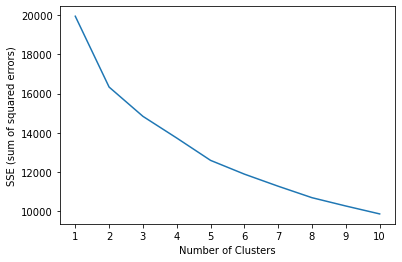

In [9]:
# initialize kmeans parameters
kmeans_kwargs = {
"init":'k-means++',
"n_init": 10,
"random_state": 1,
}

# create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (sum of squared errors)")
plt.show()

In [10]:
# In this plot it appears that there is an elbow or “bend” at k = 2 clusters

# Thus, we will use 2 clusters when fitting our k-means clustering model in the next step

# Step 4: Perform K-Means Clustering with Optimal K

### The following code shows how to perform k-means clustering on the dataset using the optimal value for k of 2 :-

In [15]:
# instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

# fit k-means algorithm to data
kmeans.fit(scaled_df)

# view cluster assignments for each observation
kmeans.labels_

array([0, 1, 1, ..., 1, 0, 0])

In [16]:
# append cluster assingments to original DataFrame
df['cluster'] = kmeans.labels_

# view updated DataFrame
df

,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity,cluster
0,157,30,53,-14,11,68,201,94,3,71,0
1,135,79,50,-11,17,81,207,17,7,39,1
2,168,69,66,-9,7,52,341,2,17,69,1
3,173,96,43,-4,3,37,269,0,4,76,1
4,106,82,58,-5,10,87,256,1,3,59,1
...,...,...,...,...,...,...,...,...,...,...,...
1989,94,21,70,-12,11,72,128,84,7,63,0
1990,175,76,36,-8,76,95,136,73,6,69,1
1991,168,80,53,-9,31,97,162,74,7,74,1
1992,174,26,45,-13,7,60,324,54,4,65,0


In [19]:
# shows dataframe type
df['cluster'].unique()

array([0, 1])

In [20]:
# count of each clusters
df['cluster'].value_counts()

1    1221
0     773
Name: cluster, dtype: int64